#                                 Proyecto 1 : Potenciales esféricos - Sympy


Integrantes: Gayol Amiel, Ulla Tomás

Para este primer proyecto, debíamos elegir algún problema de electrostática de potenciales esféricos o paralelepípedos para resolverlo aplicando el método de separación de variables, utilizando la computadora como herramienta. 

Nuestro problema consta de un cascaron conductor esférico descargado de radio r = a con una distribución de potencial en su superficie que varía con la coordenada $\theta$, de manera que se presenta una simetría azimutal (no hay dependencia de $\phi$), por lo cual en el momento de aplicar el método de separación de variables en coordenadas esféricas y calcular el Laplaciano, podemos descartar el término que corresponde a la coordenada $\phi$. De esta manera, al calcular las soluciones para las ecuaciones de las dos variables restantes, nos quedan los polinomios de Legendre como solución para $\theta$ y potencias m y – (m+1) de r para esta coordenada.  Inicialmente, buscamos el potencial V, afuera de la esfera, por lo cual tenemos como condición asintótica que el mismo vaya a cero conforme r tiende a infinito, por lo cual descartamos la potencia m de r para garantizar esto último.

$$
V(r,\theta) = \sum_{n=0}^{\infty} A_n r^{-(n+1)}P_n(cos(\theta))
$$

Como condición de contorno, pensamos en que el potencial varíe cuadraticamente en $\theta$, formando dos parábolas, una convexa y otra cóncava. Dada la naturaleza de la función, al momento de calcular las integrales que conformaban la expresión de los coeficientes de nuestra solución en serie, el programa tomaba demasiado tiempo en resolverlas, del mismo modo que cuando queríamos calcular una suma parcial de solo los primeros términos. Debido a esto, decidimos realizar tales integrales usando métodos numéricos, pero de igual forma continuamos teniendo inconvenientes con la sumatoria (mezcla de tipos en las variables). Por esta razón, decidimos cambiar nuestro potencial en la superficie por alguna expresión más sencilla que agilizara el proceso de calculo.

Se nos ocurrió que para que la integral sea fácil de resolver, teníamos que hacer aparecer una $x$ o solo potencias de $x$ que multipliquen a los $A_n$, entonces pensamos en que la variación del potencial sea de la forma $cos(\theta)$. Finalmente nos decidimos por la siguiente función:

$$
V(a,\theta)   = b\cdot cos(6\theta)
$$

Con la cual podemos hacer uso de la siguiente propiedad algebraica:

$$
cos(6\theta) = 32cos(\theta)^{6}-48cos(\theta)^{4}+18cos(\theta)^{2}-1 = 32x^{6}-48x^{4}+18x^{2}-1
$$


que se prueba básicamente usando
$$
cos(2x) = cos(x+x) = cos^{2}(x) - sin^{2}(x)
$$



Para comenzar, importamos y definimos todo lo  necesario:

In [1]:
%matplotlib inline
#%matplotlib notebook
#from __future__ import division
import sympy as sp
from sympy import *
from sympy import legendre
from numpy import *
import numpy as np
#from sympy.plotting import plot
import matplotlib.pyplot as mpl
#import matplotlib as mpl
#import matplotlib as mpl
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation, rc
from IPython.display import HTML
#init_printing(use_unicode=True)
x, y, z = symbols('x y z')
k, m, n = symbols('k m n', integer=True)
f, step, potential = symbols('f step potential', cls=Function)
mpl.rcParams['figure.figsize'] = (10,10)
#var('n m x')

Le damos un valor al radio

In [2]:
a = 1

Elegimos un valor de b

In [3]:
b = 2

Graficamente lo vemos como

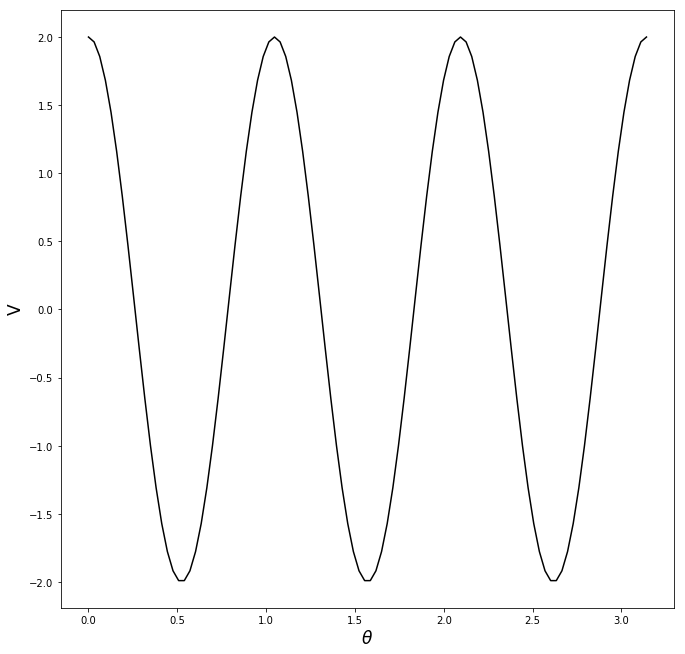

In [35]:
theta1 = np.linspace(0,np.pi,100)
potencial1 = b*np.cos(6*theta1)
mpl.plot(theta1,potencial1,color='k')
mpl.xlabel(r'$\theta$',fontsize=17)
mpl.ylabel("V",fontsize=17)
mpl.show()

Para comprender mejor la distribución de potencial, el siguiente grafico muestra la misma sobre la superficie de la esfera, denotando con distintos colores las diferentes intensidades/valores de V según en que sector del cascaron nos encontremos:

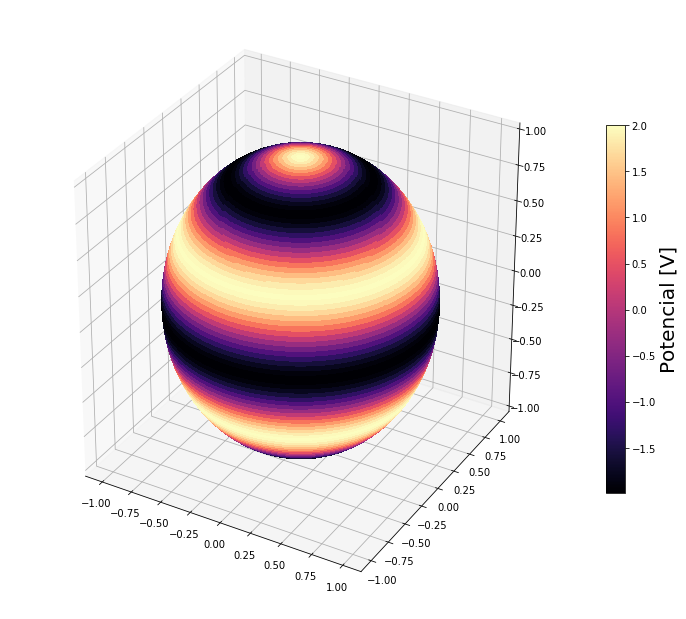

In [24]:
fig = mpl.figure()
ax = fig.add_subplot(111, projection='3d')

theta1, phi1 = np.mgrid[0:np.pi:100j, 0:2*np.pi:100j]


potencial1 = b*np.cos(6*theta1)



x1 = a * np.sin(theta1) * np.cos(phi1)
y1 = a * np.sin(theta1) * np.sin(phi1)
z1 = a * np.cos(theta1)

                
norma=colors.Normalize(vmin=-b, vmax=b)

ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       facecolors=cm.magma(norma(potencial1)))

sm = cm.ScalarMappable(cmap=cm.magma)     #hacemos esto porque sino la barra de color no anda
sm.set_array(potencial1)

cbar = mpl.colorbar(sm,fraction=0.03)
cbar.set_label('Potencial [V]',size = 20)


mpl.rcParams["figure.figsize"] = (11,11)  #agrandamos el grafico

mpl.show()

Con estas condiciones de contorno, y gracias a la ortogonalidad de los polinomios de Legendre, los $A_{m}$ quedan determinados de la siguiente forma:

$$
A_{m} = \frac{(2m+1)a^{m+1}}{2}\Bigg[  \int_{-1}^{1}b(32x^{6}-48x^{4}+18x^{2}-1)P_{m}(x)dx\Bigg]
$$

Los calculamos

In [6]:
A=lambda m: (2*m+1)*a**(m+1)*0.5*Integral(b*(32.*x**6-48.*x**4+18.*x**2-1.)*legendre(m,x),(x,-1,1)) 

Para verificar las cuentas realizadas, veamos algunos coeficientes para determinados valores de m. Cabe destacar que como V(x) es una función par, $A_{2k+1}=0$, mientras que $A_{2k}\neq0$, lo cual podemos corroborar:

In [7]:
A(3).doit()

0

In [8]:
A(4).doit()

-1.99480519480515

Verifiquemos que se cumple la condición de contorno tomando $r=a$ y haciendo una suma parcial con $c = 10$

$$
V(a,\theta) = \sum_{m=0}^{c}a^{-(m+1)}A_{m}P_{m}(cos(\theta))
$$

In [29]:
suma=lambdify(x,Sum(A(m)*legendre(m,x)*a**(-(m+1)),(m,0,10)).doit(),"numpy")

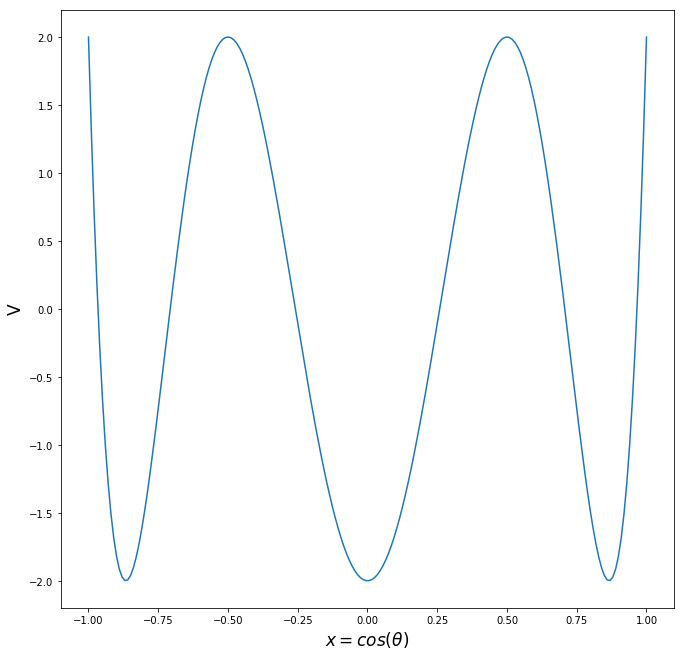

In [31]:
x_vals = linspace(-1, 1, 200)
z_vals = suma(x_vals)
mpl.plot(x_vals, z_vals)
mpl.xlabel(r'$x = cos(\theta)$',fontsize=17)
mpl.ylabel("V",fontsize=17)
mpl.show()

Notamos que prácticamente ya tenemos nuestra función deseada

Observemos que a partir de m = 40 aproximadamente los errores numericos que arrastra la máquina comienzan a afectar notablemente a la convergencia de la serie, la cual teóricamente se da en todos los puntos de la distribución excepto en las discontinuidades

In [32]:
suma=lambdify(x,Sum(A(m)*legendre(m,x)*a**(-(m+1)),(m,0,40)).doit(),"numpy")

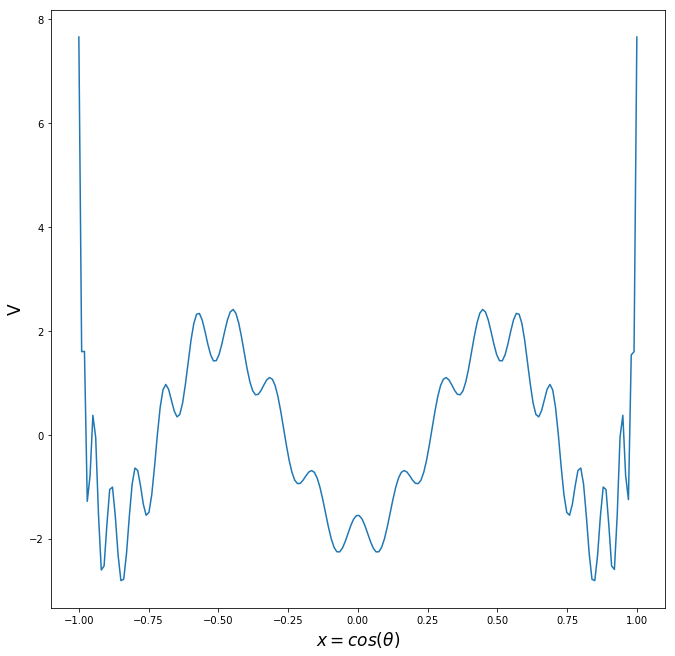

In [33]:
x_vals = linspace(-1, 1, 200)
z_vals = suma(x_vals)
mpl.plot(x_vals, z_vals)
mpl.xlabel(r'$x = cos(\theta)$',fontsize=17)
mpl.ylabel("V",fontsize=17)
mpl.show()

Podemos graficar ahora el potencial encontrado en función de $x=cos(\theta)$ y de r, con $r\geq1$, puesto que la solución es en el exterior de la esfera:

In [13]:
potencial=lambdify((x,y),Sum(A(m)*legendre(m,x)*y**(-(m+1)),(m,0,20)).doit(),"numpy")

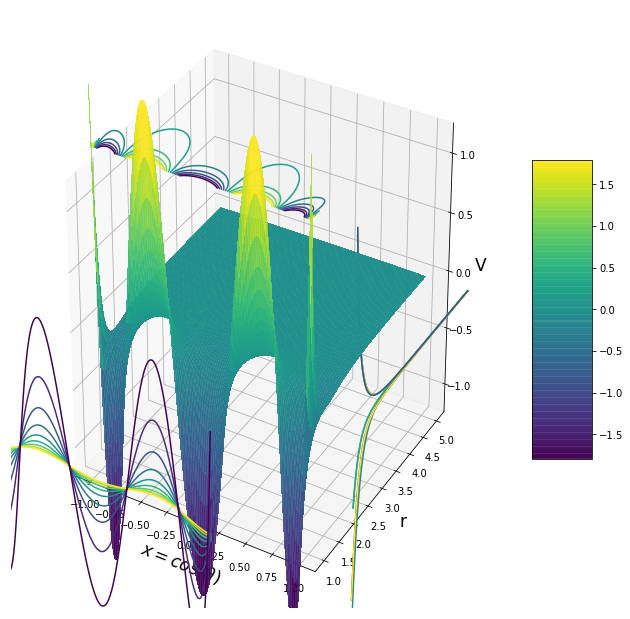

In [15]:
y_vals = linspace(1,5,200)
X,Y = meshgrid(x_vals,y_vals)
z_vals = potencial(X,Y)
fig = mpl.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.viridis,linewidth=0, antialiased=False)
levels = arange(-1., 1., 0.2)
levels_y = arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.viridis)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.viridis)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.viridis)
ax.set_xlabel(r'$x = cos(\theta)$',fontsize=17)
ax.set_ylabel('r',fontsize=17)
ax.set_zlabel('V',fontsize=17)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()

mpl.rcParams["figure.figsize"] = (11,11) 

Por otro lado, ahora podemos preguntarnos por la solución en el interior del cascaron. Para ello realizamos el mismo procedimiento, con la precaución de que en este caso, $r=0$ pertenece a la región de interés, por lo tanto, debemos descartar la solución que diverge en ese punto, es decir, ahora nos quedamos con las potencias m de r, siendo entonces el potencial:

$$
V(r,\theta) = \sum_{m=0}^{\infty}A_{in_{m}}r^{-m}P_{m}(cos(\theta))
$$

Nuevamente, haciendo uso de la condición de contorno (el valor de V en r = a) y de la ortogonalidad de los polinomios, obtenemos que:

$$
A_{in_{m}} = \frac{(2m+1)a^{-m}}{2}\Bigg[  \int_{-1}^{1}b(32x^{6}-48x^{4}+18x^{2}-1)P_{m}(x)dx\Bigg]
$$

Al igual que en el caso anterior, veamos su gráfico, para $x=cos(\theta)$ y r≤1:

In [17]:
Ain=lambda m: (2*m+1)*a**(-m)*0.5*Integral(b*(32.*x**6-48.*x**4+18.*x**2-1.)*legendre(m,x),(x,-1,1))

In [18]:
potencialin=lambdify((x,y),Sum(Ain(m)*legendre(m,x)*y**m,(m,0,20)).doit(),"numpy")

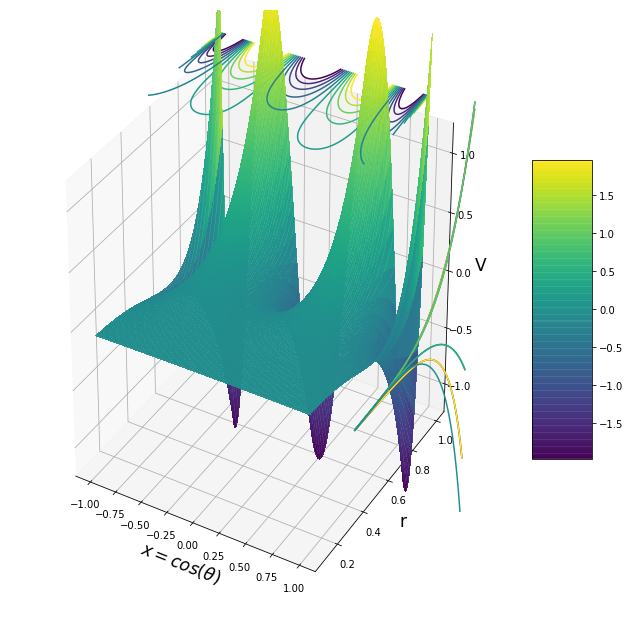

In [19]:
y_vals = linspace(0.1,1,200)
X,Y = meshgrid(x_vals,y_vals)
z_vals = potencialin(X,Y)
fig = mpl.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.viridis,linewidth=0, antialiased=False)
levels = arange(-1., 1., 0.2)
levels_y = arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.viridis)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.viridis)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.viridis)
ax.set_xlabel(r'$x = cos(\theta)$',fontsize=17)
ax.set_ylabel('r',fontsize=17)
ax.set_zlabel('V',fontsize=17)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()

mpl.rcParams["figure.figsize"] = (11,11) 

Por último, ahora que conocemos el valor del potencial tanto adentro como afuera de la esfera, es interesante observar su valor en dos puntos extremos: $r=0$, y $\lim r\to\infty$:

In [20]:
potencialin(0.8,0)

-0.0571428571428569

Este valor debería corresponder al primer coeficiente A(0)

In [21]:
A(0).doit()

-0.0571428571428569

Para radios muy grandes finalmente obtenemos

In [22]:
potencial(0.8,1.*10**10)

-5.71428571428569e-12